In [1]:
import pandas as pd
df = pd.read_csv("/content/English Premier League Squad Stats 2023-24 - Sheet1.csv")
df.head()

,Squad,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,...,Gls/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90
0,Arsenal,86,62,148,76,10,10,64,2,76.1,...,2.26,1.63,3.89,2.00,3.63,2.00,1.46,3.46,1.80,3.26
1,Aston Villa,72,55,127,68,4,4,94,2,63.3,...,1.89,1.45,3.34,1.79,3.24,1.67,1.28,2.95,1.59,2.87
2,Bournemouth,52,39,91,50,2,3,79,3,55.9,...,1.37,1.03,2.39,1.32,2.34,1.47,1.06,2.54,1.41,2.47
3,Brentford,54,38,92,51,3,3,89,2,58.2,...,1.42,1.00,2.42,1.34,2.34,1.53,1.12,2.66,1.47,2.60
4,Brighton,50,36,86,45,5,6,90,3,56.8,...,1.32,0.95,2.26,1.18,2.13,1.49,1.09,2.59,1.37,2.47


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


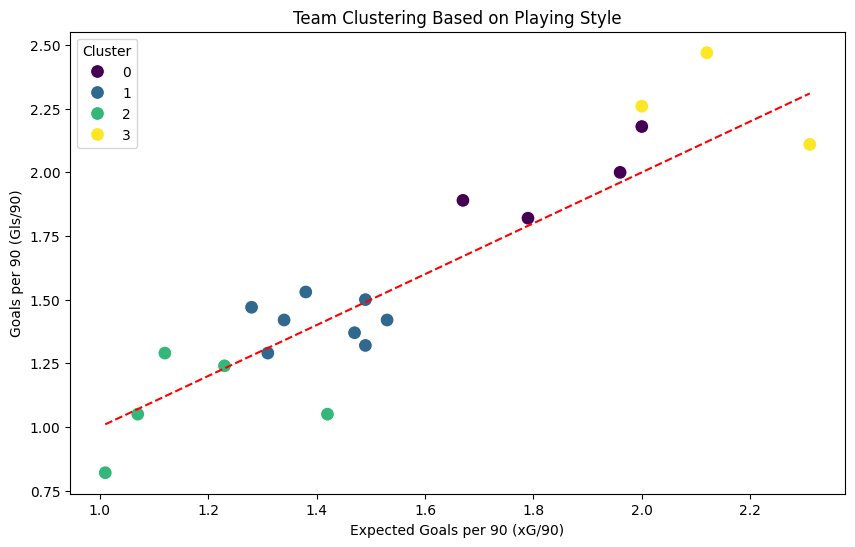

Cluster Centers:
 [[ 0.90875512  0.87003167  0.90323413  0.91752787  0.84826336  0.90810008
   0.87142158  0.90300289  0.91278942  0.84872654  0.88574872  0.87436786
   0.86810932  0.8832856 ]
 [-0.3659014  -0.2635901  -0.32425938 -0.31309801 -0.38255729 -0.36552456
  -0.26506322 -0.32373004 -0.31230347 -0.38408001 -0.34345358 -0.36794665
  -0.34238608 -0.33953129]
 [-1.10670178 -1.19076369 -1.15962526 -1.16867601 -1.05540592 -1.10799632
  -1.18893794 -1.15982022 -1.16796421 -1.05431006 -1.12616622 -1.09434457
  -1.09845602 -1.12112558]
 [ 1.60856655  1.52747086  1.59308827  1.55935089  1.64814483  1.6105926
   1.52650307  1.59230996  1.56236371  1.64976141  1.61182164  1.63927488
   1.58631047  1.59624527]]
              Squad  Cluster
0           Arsenal        3
1       Aston Villa        0
2       Bournemouth        1
3         Brentford        1
4          Brighton        1
5           Burnley        2
6           Chelsea        0
7    Crystal Palace        1
8           Everton  

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features = ['Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Change the number of clusters if needed
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='xG/90', y='Gls/90', hue='Cluster', palette='viridis', s=100)
plt.plot([df['xG/90'].min(), df['xG/90'].max()], [df['xG/90'].min(), df['xG/90'].max()], 'r--')  # Line where xG/90 = Gls/90
plt.title('Team Clustering Based on Playing Style')
plt.xlabel('Expected Goals per 90 (xG/90)')
plt.ylabel('Goals per 90 (Gls/90)')
plt.show()

# Display cluster centroids
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Show the clustered DataFrame
print(df[['Squad', 'Cluster']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


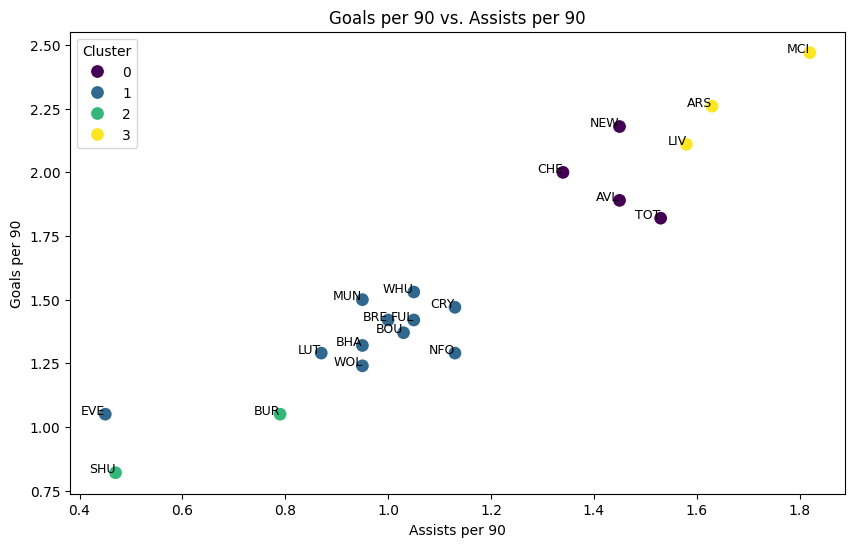

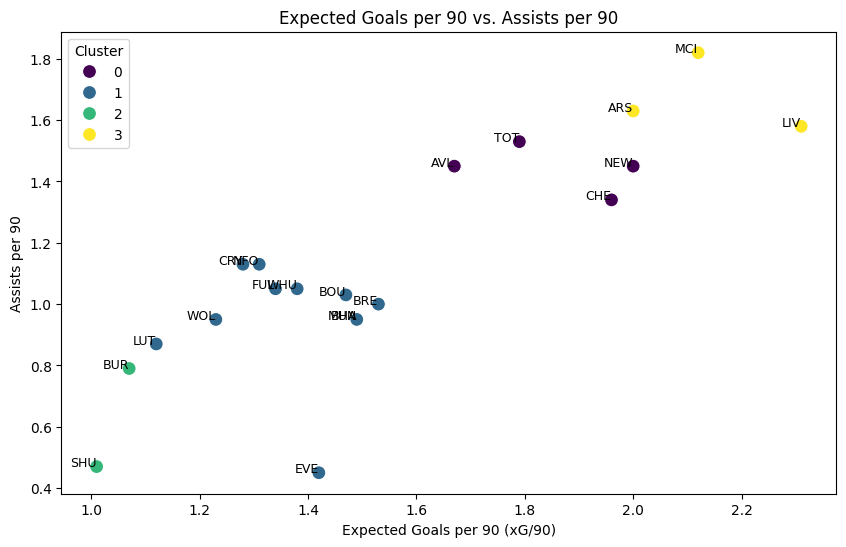

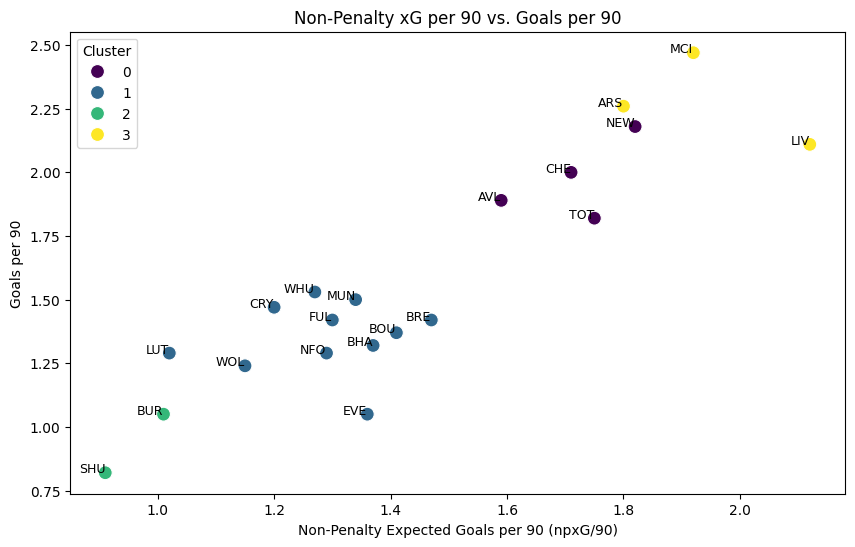

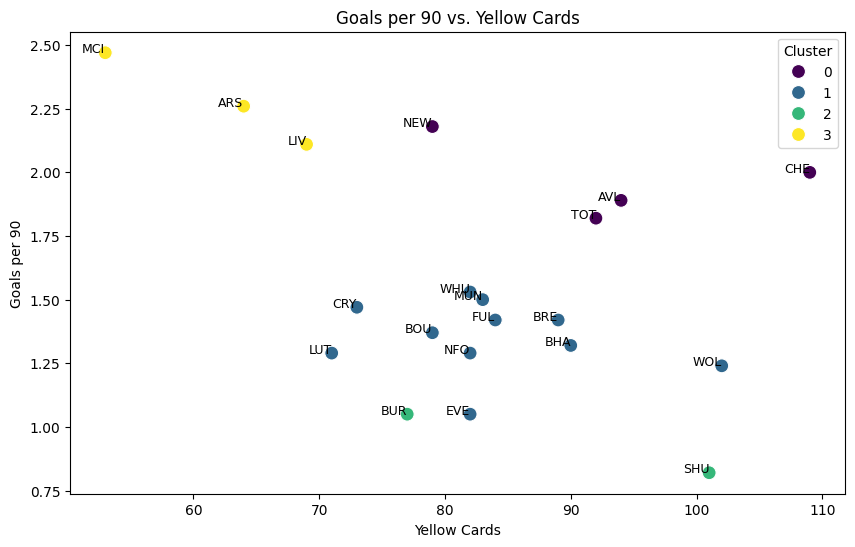

<ipython-input-3-e6da5a44021b>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Gls/90', palette='viridis')


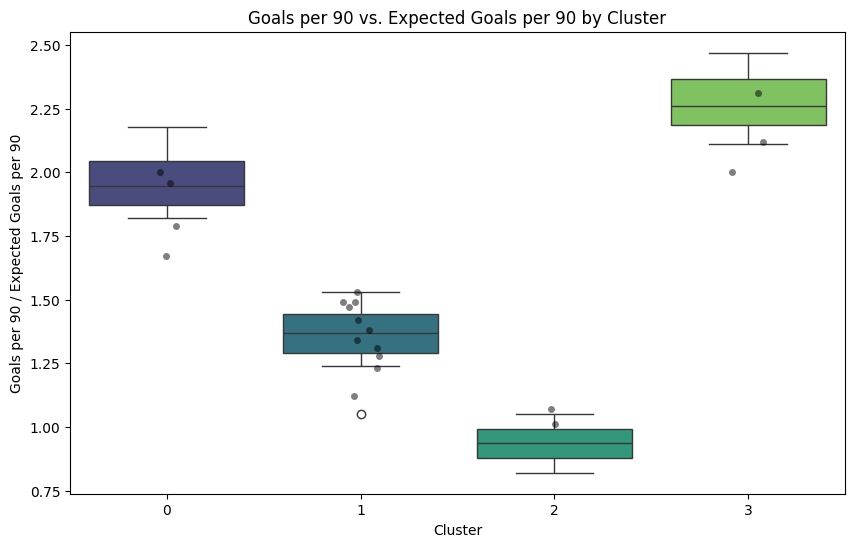

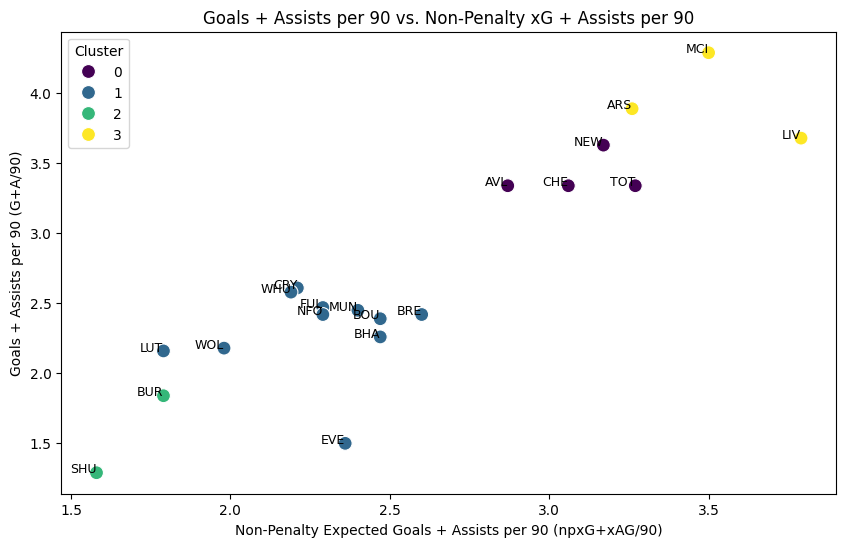

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/English Premier League Squad Stats 2023-24 - Sheet1.csv")

abbreviations = {
    "Arsenal": "ARS",
    "Aston Villa": "AVL",
    "Bournemouth": "BOU",
    "Brentford": "BRE",
    "Brighton": "BHA",
    "Burnley": "BUR",
    "Chelsea": "CHE",
    "Crystal Palace": "CRY",
    "Everton": "EVE",
    "Fulham": "FUL",
    "Liverpool": "LIV",
    "Luton Town": "LUT",
    "Manchester City": "MCI",
    "Manchester Utd": "MUN",
    "Newcastle Utd": "NEW",
    "Nott'ham Forest": "NFO",
    "Sheffield Utd": "SHU",
    "Tottenham": "TOT",
    "West Ham": "WHU",
    "Wolves": "WOL"
}

# Select features for clustering
features = [
    'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG',
    'npxG+xAG', 'PrgC', 'PrgP', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
    'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90'
]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Function to add team abbreviations to the scatter plot
def add_labels(df, x_col, y_col, abbreviations):
    for i in range(df.shape[0]):
        plt.text(df[x_col][i], df[y_col][i], abbreviations[df['Squad'][i]], fontsize=9, ha='right')

# Plot: Goals per 90 vs. Assists per 90
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ast/90', y='Gls/90', hue='Cluster', palette='viridis', s=100)
add_labels(df, 'Ast/90', 'Gls/90', abbreviations)
plt.title('Goals per 90 vs. Assists per 90')
plt.xlabel('Assists per 90')
plt.ylabel('Goals per 90')
plt.show()

# Plot: xG per 90 vs. Assists per 90
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='xG/90', y='Ast/90', hue='Cluster', palette='viridis', s=100)
add_labels(df, 'xG/90', 'Ast/90', abbreviations)
plt.title('Expected Goals per 90 vs. Assists per 90')
plt.xlabel('Expected Goals per 90 (xG/90)')
plt.ylabel('Assists per 90')
plt.show()

# Plot: Non-Penalty xG per 90 vs. Goals per 90
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='npxG/90', y='Gls/90', hue='Cluster', palette='viridis', s=100)
add_labels(df, 'npxG/90', 'Gls/90', abbreviations)
plt.title('Non-Penalty xG per 90 vs. Goals per 90')
plt.xlabel('Non-Penalty Expected Goals per 90 (npxG/90)')
plt.ylabel('Goals per 90')
plt.show()

# Plot: Goals per 90 vs. Yellow Cards
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CrdY', y='Gls/90', hue='Cluster', palette='viridis', s=100)
add_labels(df, 'CrdY', 'Gls/90', abbreviations)
plt.title('Goals per 90 vs. Yellow Cards')
plt.xlabel('Yellow Cards')
plt.ylabel('Goals per 90')
plt.show()

# Box Plot: Goals per 90 vs. xG per 90 by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Gls/90', palette='viridis')
sns.stripplot(data=df, x='Cluster', y='xG/90', color='black', alpha=0.5, jitter=True)
plt.title('Goals per 90 vs. Expected Goals per 90 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Goals per 90 / Expected Goals per 90')
plt.show()

# Plot: Goals + Assists per 90 vs. Non-Penalty xG + Assists per 90
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='npxG+xAG/90', y='G+A/90', hue='Cluster', palette='viridis', s=100)
add_labels(df, 'npxG+xAG/90', 'G+A/90', abbreviations)
plt.title('Goals + Assists per 90 vs. Non-Penalty xG + Assists per 90')
plt.xlabel('Non-Penalty Expected Goals + Assists per 90 (npxG+xAG/90)')
plt.ylabel('Goals + Assists per 90 (G+A/90)')
plt.show()


In [4]:
# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=features)
df_cluster_centers['Cluster'] = range(len(df_cluster_centers))

print(df_cluster_centers)

         Gls        Ast         G+A       G-PK        PK     PKatt       CrdY  \
0  75.000000  54.750000  129.750000  68.750000  6.250000  6.750000  93.500000   
1  51.454545  36.454545   87.909091  48.000000  3.454545  3.909091  83.363636   
2  35.500000  24.000000   59.500000  31.500000  4.000000  4.000000  89.000000   
3  86.666667  63.666667  150.333333  78.333333  8.333333  9.666667  62.000000   

       CrdR         xG       npxG  ...    Ast/90    G+A/90   G-PK/90  \
0  2.750000  70.500000  65.275000  ...  1.442500  3.412500  1.807500   
1  2.363636  52.009091  48.972727  ...  0.960000  2.312727  1.262727   
2  6.000000  39.450000  36.350000  ...  0.630000  1.565000  0.825000   
3  3.000000  81.466667  73.933333  ...  1.676667  3.953333  2.063333   

   G+A-PK/90     xG/90    xAG/90  xG+xAG/90   npxG/90  npxG+xAG/90  Cluster  
0   3.250000  1.855000  1.372500   3.230000  1.717500     3.092500        0  
1   2.221818  1.369091  0.989091   2.359091  1.289091     2.277273        1  

In [5]:
from sklearn.inspection import permutation_importance

# Use KMeans cluster labels as a target for feature importance analysis
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
result = permutation_importance(kmeans, X_scaled, kmeans.labels_, n_repeats=10, random_state=42)
importance_df = pd.DataFrame(result['importances_mean'], index=features, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

             Importance
G-PK          34.817764
G-PK/90       34.814261
Gls/90        34.791325
Gls           34.734195
G+A           34.600491
G+A/90        34.572067
G+A-PK/90     34.308187
xG+xAG/90     34.283205
xAG/90        33.883070
npxG+xAG      33.861744
npxG+xAG/90   33.835429
xG/90         33.819924
xG            33.782413
xAG           33.766696
npxG/90       33.491163
npxG          33.442984
Ast/90        32.473333
Ast           32.441478
PrgP          28.344326
PrgC          22.986847
CrdY          21.896712
PKatt         18.436523
PK            17.058882
CrdR          16.193681


In [6]:
# Descriptive statistics by cluster
descriptive_stats = df.groupby('Cluster').describe().transpose()
print(descriptive_stats)

Cluster                    0          1          2          3
Gls         count   4.000000  11.000000   2.000000   3.000000
            mean   75.000000  51.454545  35.500000  86.666667
            std     6.055301   5.222330   6.363961   7.023769
            min    69.000000  40.000000  31.000000  80.000000
            25%    71.250000  49.000000  33.250000  83.000000
...                      ...        ...        ...        ...
npxG+xAG/90 min     2.870000   1.790000   1.580000   3.260000
            25%     3.012500   2.200000   1.632500   3.380000
            50%     3.115000   2.290000   1.685000   3.500000
            75%     3.195000   2.435000   1.737500   3.645000
            max     3.270000   2.600000   1.790000   3.790000

[192 rows x 4 columns]


In [7]:
# Select features for clustering
features = [
    'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG',
    'npxG+xAG', 'PrgC', 'PrgP', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
    'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90'
]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


In [8]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=features)
df_cluster_centers['Cluster'] = range(len(df_cluster_centers))

print("Cluster Centers:")
print(df_cluster_centers)

# Feature Importance
result = permutation_importance(kmeans, X_scaled, kmeans.labels_, n_repeats=10, random_state=42)
importance_df = pd.DataFrame(result['importances_mean'], index=features, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

# Descriptive statistics by cluster
descriptive_stats = df.groupby('Cluster').describe().transpose()
print("Descriptive Statistics by Cluster:")
print(descriptive_stats)


Cluster Centers:
         Gls        Ast         G+A       G-PK        PK     PKatt       CrdY  \
0  80.000000  58.571429  138.571429  72.857143  7.142857  8.000000  80.000000   
1  51.454545  36.454545   87.909091  48.000000  3.454545  3.909091  83.363636   
2  35.500000  24.000000   59.500000  31.500000  4.000000  4.000000  89.000000   

       CrdR         xG       npxG  ...    Ast/90    G+A/90   G-PK/90  \
0  2.857143  75.200000  68.985714  ...  1.542857  3.644286  1.917143   
1  2.363636  52.009091  48.972727  ...  0.960000  2.312727  1.262727   
2  6.000000  39.450000  36.350000  ...  0.630000  1.565000  0.825000   

   G+A-PK/90     xG/90    xAG/90  xG+xAG/90   npxG/90  npxG+xAG/90  Cluster  
0   3.458571  1.978571  1.458571   3.437143  1.815714     3.274286        0  
1   2.221818  1.369091  0.989091   2.359091  1.289091     2.277273        1  
2   1.460000  1.040000  0.730000   1.770000  0.960000     1.685000        2  

[3 rows x 25 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Feature Importance:
             Importance
G-PK          33.886838
G-PK/90       33.852482
Gls/90        33.622984
Gls           33.574420
G+A           33.362549
G+A/90        33.334077
G+A-PK/90     33.204604
xG+xAG/90     33.061275
npxG+xAG      32.831277
npxG+xAG/90   32.828450
xAG/90        32.665833
npxG/90       32.585047
xAG           32.578831
npxG          32.562963
xG/90         32.555261
xG            32.523573
Ast/90        31.226124
Ast           31.185310
PrgP          24.617862
PrgC          21.025693
CrdR          16.021084
PKatt         15.845618
PK            15.413317
CrdY           1.056430
Descriptive Statistics by Cluster:
Cluster                    0          1          2
Gls         count   7.000000  11.000000   2.000000
            mean   80.000000  51.454545  35.500000
            std     8.582929   5.222330   6.363961
            min    69.000000  40.000000  31.000000
            25%    74.000000  49.000000  33.250000
...                      ...        ...

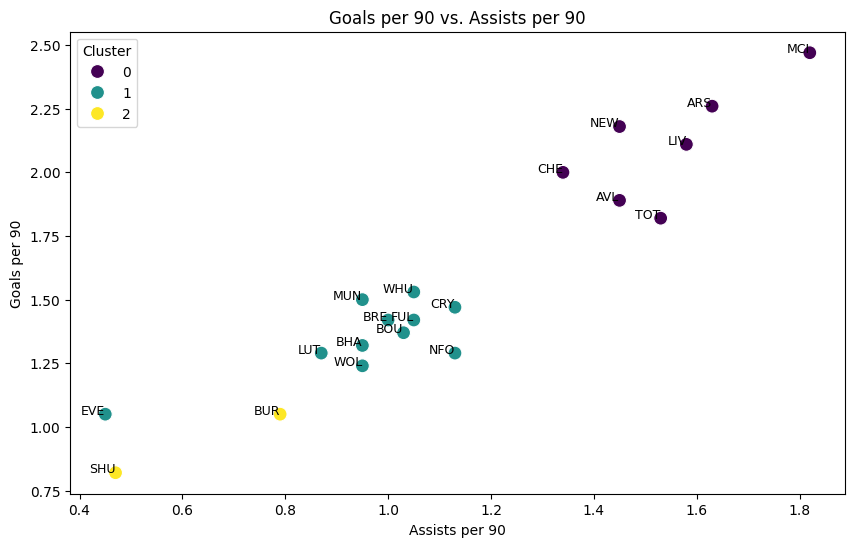

In [9]:
# Function to add team abbreviations to the scatter plot
def add_labels(df, x_col, y_col, abbreviations):
    for i in range(df.shape[0]):
        plt.text(df[x_col][i], df[y_col][i], abbreviations[df['Squad'][i]], fontsize=9, ha='right')

# Plot: Goals per 90 vs. Assists per 90
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ast/90', y='Gls/90', hue='Cluster', palette='viridis', s=100)
add_labels(df, 'Ast/90', 'Gls/90', abbreviations)
plt.title('Goals per 90 vs. Assists per 90')
plt.xlabel('Assists per 90')
plt.ylabel('Goals per 90')
plt.show()


In [10]:
def analyze_team_styles(df):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Cluster centers
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    df_cluster_centers = pd.DataFrame(cluster_centers, columns=features)
    df_cluster_centers['Cluster'] = range(len(df_cluster_centers))

    # Feature importance
    result = permutation_importance(kmeans, X_scaled, kmeans.labels_, n_repeats=10, random_state=42)
    importance_df = pd.DataFrame(result['importances_mean'], index=features, columns=['Importance'])
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Descriptive statistics by cluster
    descriptive_stats = df.groupby('Cluster').describe().transpose()

    return df, df_cluster_centers, importance_df, descriptive_stats

# Apply the analysis function to the dataset
df, df_cluster_centers, importance_df, descriptive_stats = analyze_team_styles(df)

# Print results
print("Cluster Centers:")
print(df_cluster_centers)
print("\nFeature Importance:")
print(importance_df)
print("\nDescriptive Statistics by Cluster:")
print(descriptive_stats)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
         Gls        Ast         G+A       G-PK        PK     PKatt       CrdY  \
0  80.000000  58.571429  138.571429  72.857143  7.142857  8.000000  80.000000   
1  51.454545  36.454545   87.909091  48.000000  3.454545  3.909091  83.363636   
2  35.500000  24.000000   59.500000  31.500000  4.000000  4.000000  89.000000   

       CrdR         xG       npxG  ...    Ast/90    G+A/90   G-PK/90  \
0  2.857143  75.200000  68.985714  ...  1.542857  3.644286  1.917143   
1  2.363636  52.009091  48.972727  ...  0.960000  2.312727  1.262727   
2  6.000000  39.450000  36.350000  ...  0.630000  1.565000  0.825000   

   G+A-PK/90     xG/90    xAG/90  xG+xAG/90   npxG/90  npxG+xAG/90  Cluster  
0   3.458571  1.978571  1.458571   3.437143  1.815714     3.274286        0  
1   2.221818  1.369091  0.989091   2.359091  1.289091     2.277273        1  
2   1.460000  1.040000  0.730000   1.770000  0.960000     1.685000        2  

[3 rows x 25 columns]

Feature Importance:
             

In [11]:
import os

import google.generativeai as genai

In [15]:
import pandas as pd

# Convert numeric columns to float
df[features] = df[features].apply(pd.to_numeric)

# Calculate average statistics for each cluster
avg_cluster_stats = df.groupby('Cluster')[features].mean()

# Choose a specific team (e.g., 'Manchester Utd')
team_name = 'Manchester Utd'
df_specific = df.loc[df['Squad'] == team_name]

# Get the cluster of the specific team
team_cluster = df_specific['Cluster'].values[0]

# Get the average statistics for the cluster of the specific team
avg_stats_cluster_specific = avg_cluster_stats.loc[team_cluster]

# Compare the specific team's statistics to the average cluster statistics
comparison = df_specific.set_index('Squad')[features].squeeze() - avg_stats_cluster_specific

# Explain the playing style of the specific team
explanation = f"{team_name} plays similarly to other teams in cluster {team_cluster}.\n"
explanation += "Key differences from the cluster average:\n"
for stat, diff in comparison.items():
    explanation += f"- {stat}: {'Above' if diff > 0 else 'Below'} average by {abs(diff):.2f}\n"

print(explanation)

Manchester Utd plays similarly to other teams in cluster 1.
Key differences from the cluster average:
- Gls: Above average by 5.55
- Ast: Below average by 0.45
- G+A: Above average by 5.09
- G-PK: Above average by 3.00
- PK: Above average by 2.55
- PKatt: Above average by 3.09
- CrdY: Below average by 0.36
- CrdR: Below average by 1.36
- xG: Above average by 4.49
- npxG: Above average by 2.03
- xAG: Above average by 2.52
- npxG+xAG: Above average by 4.44
- PrgC: Above average by 121.36
- PrgP: Above average by 181.91
- Gls/90: Above average by 0.15
- Ast/90: Below average by 0.01
- G+A/90: Above average by 0.14
- G-PK/90: Above average by 0.08
- G+A-PK/90: Above average by 0.07
- xG/90: Above average by 0.12
- xAG/90: Above average by 0.07
- xG+xAG/90: Above average by 0.18
- npxG/90: Above average by 0.05
- npxG+xAG/90: Above average by 0.12



In [13]:
# Cluster Centers Summary
cluster_summary = df_cluster_centers.to_dict(orient='records')

# Feature Importance Summary
feature_importance_summary = importance_df.reset_index().to_dict(orient='records')

# Descriptive Statistics Summary
descriptive_stats_summary = descriptive_stats.reset_index().to_dict(orient='records')


In [18]:
# Example function to generate LLM prompt and get interpretation
def generate_llm_interpretation(cluster_summary, feature_importance_summary, descriptive_stats_summary):
    prompt = (
        "Here is a summary of a football teams analysis based on various metrics:\n\n"
        f"Cluster Centers:\n{cluster_summary}\n\n"
        f"Feature Importance:\n{feature_importance_summary}\n\n"
        f"Descriptive Statistics:\n{descriptive_stats_summary}\n\n"
        f"Explain how this team plays based on their performance in their cluster:{explanation}\n"
        "Make the explanation very nuanced and take into account the description of the cluster and the team performance. Clearly explain the strengths and weaknesses of the team this season. Make clear inferences by making connections (interconnected) between the stats, and the general cluster behaviour."
    )

    # Create the model
    # See https://ai.google.dev/api/python/google/generativeai/GenerativeModel
    generation_config = {
      "temperature": 1,
      "top_p": 0.95,
      "top_k": 64,
      "max_output_tokens": 8192,
      "response_mime_type": "text/plain",
    }

    model = genai.GenerativeModel(
      model_name="gemini-1.5-flash",
      generation_config=generation_config,
      # safety_settings = Adjust safety settings
      # See https://ai.google.dev/gemini-api/docs/safety-settings
    )

    chat_session = model.start_chat()

    response = chat_session.send_message(prompt)

    print(response.text)

# Generate interpretation
interpretation = generate_llm_interpretation(cluster_summary, feature_importance_summary, descriptive_stats_summary)
print(interpretation)


Manchester United's performance this season, while aligning with the general characteristics of cluster 1, exhibits distinct nuances that reveal both strengths and weaknesses. 

**Cluster 1 Overview:** This cluster generally represents teams that are **mid-table performers**, characterized by **solid goalscoring** and **above-average assists**. Their game style suggests a **balanced approach** with neither a strong focus on defensive solidity nor an overwhelming offensive intent. 

**Manchester United's Distinctive Performance:**

**Strengths:**

* **Goalscoring Prowess:** United outperforms the cluster average in goals scored (Gls), goals per 90 minutes (Gls/90), and expected goals (xG) and non-penalty expected goals (npxG). This signifies a consistent ability to find the back of the net, a key strength for any team.
* **Creative Playmaking:** Their above-average xAG and xAG/90 demonstrate strong underlying creative potential, even though their actual assists (Ast) are slightly below 